In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Data source: https://www.propublica.org/datastore/dataset/chicago-parking-ticket-data
# Original csv was 7.67 GB, which is too big for my desktop to handle, 
# here I randomly choose 20% of the original dataset to analyze.

df_CCPT = pd.read_csv('./data/parking_tickets_frac.csv')

In [3]:
# Check the first 5 rows
df_CCPT.head(5)

,Unnamed: 0,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,...,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address
0,19727593,9185717028,2014-08-05 21:26:00,1852 N MAUD,1e55730db26522e18e6cc4e37db1d5e49a1e9740ef56b5...,MI,PAS,NaN,0964090E,RESIDENTIAL PERMIT PARKING,...,150,0.0,75.0,Paid,2014-08-18 00:00:00,NaN,NaN,0,1432,"1800 n maud, chicago, il"
1,19367998,64352592,2014-06-14 09:41:00,4057 N SUNNYSIDE,e2ceaa3ed4fba9fa9ddeb146a1218c43eedac433ebacef...,IL,PAS,605212454,0964040B,STREET CLEANING,...,120,0.0,60.0,Paid,2014-08-23 00:00:00,NaN,NaN,5181940070,18937,"4000 n sunnyside, chicago, il"
2,5681589,9177655732,2009-01-07 19:56:00,3324 N HALSTED ST,c822dc8d016c735a2d95f33cd9fda4c89519c7aa8c1073...,IL,PAS,606473722,0964200B,PARK OUTSIDE METERED SPACE,...,100,0.0,50.0,Paid,2009-02-05 00:00:00,VIOL,NaN,5105450510,1030,"3300 n halsted st, chicago, il"
3,22647956,9188902856,2015-10-24 14:55:00,1953 N LACROSSE AV,0dc52cb43957b09dfc5514e2080d5c1e2a8de3747fe144...,IL,PAS,606512031,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,...,100,0.0,50.0,Paid,2015-10-29 00:00:00,NaN,NaN,5131145590,1408,"1900 n lacrosse av, chicago, il"
4,1161221,9058219394,2007-05-30 17:27:00,1151 W WAVELAND,c99f5ac386092c0274cc2b247e1a411baf8f3a1587965b...,IL,PAS,600351014,0964090E,RESIDENTIAL PERMIT PARKING,...,100,0.0,50.0,Paid,2007-06-26 00:00:00,VIOL,NaN,5084345240,678,"1100 w waveland, chicago, il"


In [4]:
hd = {'Unique Entry': df_CCPT.nunique(axis = 0),
        'Nan Entry': df_CCPT.isnull().any()}
pd.DataFrame(data = hd, index = df_CCPT.columns.values)

# potential columns to drop: ticket_number,license_plate_number,zipcode,unit,unit_description,notice_number
#violation_location(since its normalized to address),violation_code (violation_description is more accurate)  

,Unique Entry,Nan Entry
Unnamed: 0,5654516,False
ticket_number,5654516,False
issue_date,2978168,False
violation_location,1461772,False
license_plate_number,3148505,False
license_plate_state,63,True
license_plate_type,152,True
zipcode,752499,True
violation_code,130,False
violation_description,128,False


In [5]:
# Drop columns that are not needed here
col2drop = ['Unnamed: 0','ticket_number','license_plate_number','zipcode',
          'unit','unit_description','notice_number','violation_location','violation_code']
df_CCPT.drop(labels=col2drop ,axis = 1,inplace = True)

In [6]:
# Drop rows that are not needed here
row2drop= ['license_plate_state']
df_CCPT.dropna(axis = 0, how = 'any', subset = row2drop, inplace = True)

In [7]:
# convert the issue_date to pd.datetime so it can be analyzed
df_CCPT['issue_date'] = pd.to_datetime(df_CCPT['issue_date'])
# Here I choose that data between year 2016 and 2017 as a demonstration for the plot
mask1617 = ((df_CCPT['issue_date'] >= pd.Timestamp(2016,1,1,0)) & (df_CCPT['issue_date'] <pd.Timestamp(2018,1,1,0)))
df_CCPT1617 = df_CCPT.loc[mask1617]

In [10]:
# check the top 20 violation types
df_CCPT1617['violation_description'].value_counts().head(20)

EXPIRED PLATES OR TEMPORARY REGISTRATION              125534
STREET CLEANING                                       106741
EXP. METER NON-CENTRAL BUSINESS DISTRICT               97760
NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 LBS.     89421
RESIDENTIAL PERMIT PARKING                             79698
PARKING/STANDING PROHIBITED ANYTIME                    61721
EXPIRED METER CENTRAL BUSINESS DISTRICT                51278
REAR AND FRONT PLATE REQUIRED                          39355
NO STANDING/PARKING TIME RESTRICTED                    31233
EXPIRED PLATE OR TEMPORARY REGISTRATION                25474
RUSH HOUR PARKING                                      25048
WITHIN 15' OF FIRE HYDRANT                             17163
PARK OR STAND IN BUS/TAXI/CARRIAGE STAND               14237
MISSING/NONCOMPLIANT FRONT AND/OR REAR PLATE            9756
STOP SIGN OR TRAFFIC SIGNAL                             8419
OBSTRUCT ROADWAY                                        7204
DOUBLE PARKING OR STANDI

In [11]:
# check the distribution of current status for the tickets
df_CCPT1617['ticket_queue'].value_counts()

Paid           553811
Notice         164425
Define          84749
Dismissed       76399
Bankruptcy       9755
Court             567
Hearing Req        62
Name: ticket_queue, dtype: int64

Here I want to analyze that among the top 20 types of violations, 
of what fraction are they paid, dismissed, appealled but was found responsible, or won't pay. 
You can find the detailed explaination of ticket_queue in /data/data_dictionary.txt

In [12]:
violation_type = df_CCPT1617['violation_description'].value_counts().index
ticket_status = df_CCPT1617['ticket_queue'].value_counts().index
# Here I categorize the ticket status in to 4:
# Paid, Dissmissed, Likely to be Guilty (Notice), Unlikely to pay (the rest: Define, Court, Bankrupcy,Hearing Req)
count_by_vt = np.zeros([20,4])

for vt_index in np.arange(20):
    mask = (df_CCPT1617['violation_description'] == violation_type[vt_index])
    count_by_vt[vt_index,0] = np.count_nonzero(df_CCPT1617.loc[mask]['ticket_queue'] == 'Paid')
    count_by_vt[vt_index,1] = np.count_nonzero(df_CCPT1617.loc[mask]['ticket_queue'] == 'Dismissed')
    count_by_vt[vt_index,2] = np.count_nonzero(df_CCPT1617.loc[mask]['ticket_queue'] == 'Notice') 
    count_by_vt[vt_index,3] = df_CCPT1617.loc[mask]['ticket_queue'].size - np.sum(count_by_vt[vt_index,0:3])

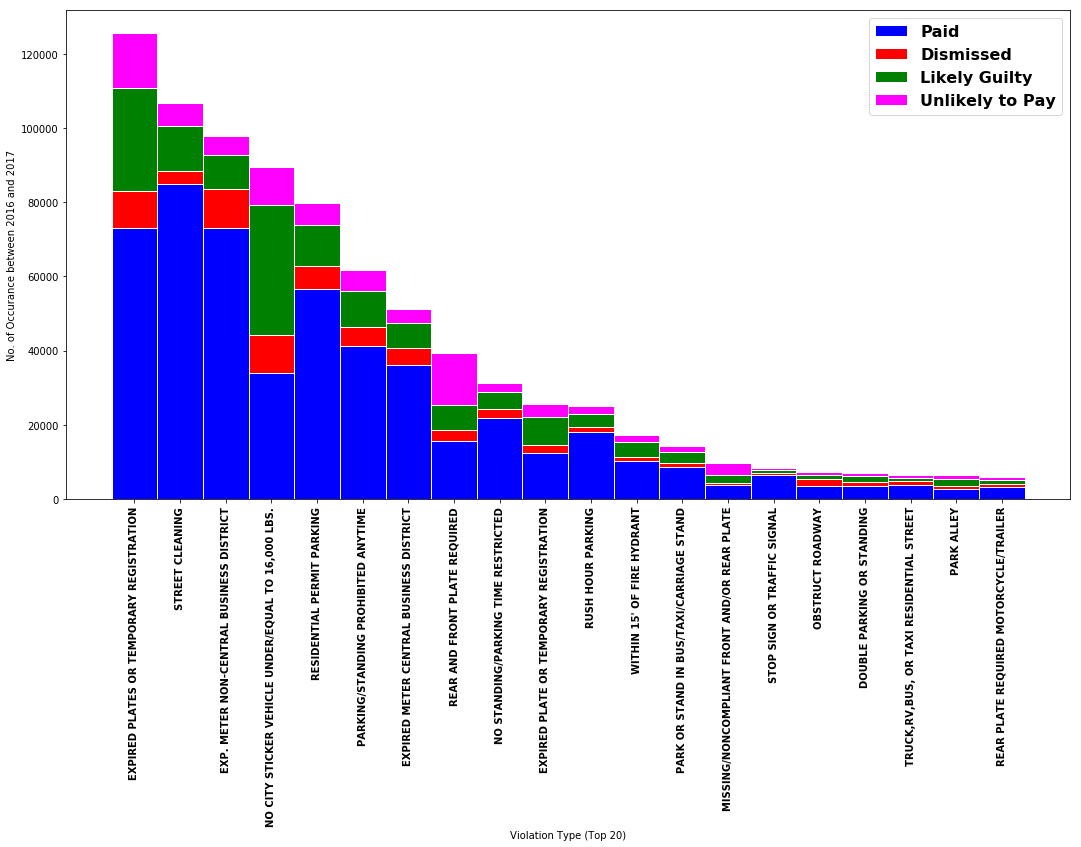

In [13]:
from matplotlib import rc

plt.figure(figsize=(18,9))
plt.tick_params(labelbottom=True)
rc('font',weight = 'bold')
r = np.arange(20)
# bar width
BW = 1

plt.bar(r, count_by_vt[:,0], color='blue', edgecolor='white', width=BW,label = 'Paid')
plt.bar(r, count_by_vt[:,1], bottom=count_by_vt[:,0], color='red', edgecolor='white', width=BW,label='Dismissed')
plt.bar(r, count_by_vt[:,2], bottom=np.sum(count_by_vt[:,0:2],axis = 1), color='green', edgecolor='white', width=BW,label='Likely Guilty')
plt.bar(r, count_by_vt[:,3], bottom=np.sum(count_by_vt[:,0:3],axis = 1), color='magenta', edgecolor='white', width=BW,label='Unlikely to Pay')

plt.xticks(r, violation_type[:20], fontweight='bold',rotation='vertical')
plt.xlabel("Violation Type (Top 20)")
plt.ylabel("No. of Occurance between 2016 and 2017")
plt.legend(fontsize = 16)
plt.show()

This plot shows that, between year 2016 and 2017, violation due to expired plates or temporary registration contributed the most of the total parking ticket issued. Parking violation such as street cleaning, expired meter and residential permit parking also contributed large portion of the total tickets. 

To better demonstrate the current status of the tickets (are they paid, dismissed or going through appeal?), I used different colors to indicate them. Here blue means the ticket is already paid; red means the ticket is dismissed either internally or as a result of an appeal; magenta means the the city is not able to collect the fine; green means that an appeal has been requested but eventually identified as guilty or the associated owner is involved in other cases. 

Parking related violation such as "street cleaning", "expired meter in CBD", "residential permint parking" all appear to have a high "paid" status, meaning the officers did a good job on issuing such ticket. The only exception is the expired meter in non-central business district, which has a relative high portion of dismissed tickets. For most cases, both "dismissed" and "likely guilty" mean that an appeal had been requested. Interestingly, violation type "expired plates ..." and "no city sticker vehicle ..." have a high rate of appeal requested. However, only a small porting (red) is dismissed, most of them are still identified as a violation. I'm not familiar with the regulations on vehcile registration in Chicago, there could mean a mis-communication between the city and the residents. There are also some obvious patterns, such as high portion of violation type "rear or front plate required" tickets end up with the city unable to identify the associated owner. 